# **Adidas Sales Analysis**

## 🗂️ Project Overview
The Adidas Sales Analysis project leverages robust data visualization and collaborative analysis tools to optimize sales strategies and enhance overall performance. This project identifies key sales drivers, geographic performance trends, and product-specific insights, enabling the Adidas team to make informed decisions about pricing, inventory, and marketing.

## 🎯 Objectives

1. **Enhanced Understanding of Sales Dynamics**: Analyze sales trends and identify key performance drivers across various regions, products, and sales methods.
2. **Geographic Sales Potential:** Detect regions with high and low sales potential to enable strategic regional focus and resource allocation.
3. **Product Performance Insights:** Evaluate product-specific performance metrics to inform inventory management and marketing strategies.
4. **Informed Pricing and Margin Strategies:** Develop data-backed pricing strategies and optimize operating margins for improved profitability.
5. **Actionable Recommendations:** Provide clear, data-driven recommendations to optimize sales and profitability across multiple business dimensions.

## 📊 Data Description
Metrics
- Total Sales: Total revenue generated from product sales.
- Operating Profit: Profit calculated as the difference between Total Sales and operating expenses.
- Units Sold: Total number of product units sold.
- Price per Unit: Selling price of each product unit.
- Operating Margin: The ratio of Operating Profit to Total Sales, indicating profitability.

Dimensions
- Retailer: Name of the retailer responsible for the transaction.
- Product: Name and category of the product sold (e.g., Men's Footwear, Women's Apparel).
- Region: Geographic region of the transaction (e.g., Northeast, Midwest).
- State: U.S. state where the transaction occurred.
- City: City where the transaction took place.
- Invoice Date: Date of the sales transaction.
- Sales Method: Sales channel used (e.g., In-store, Online).

This breakdown of metrics and dimensions provides a structured approach for analyzing sales trends and profitability while supporting strategic business decisions.

# 🌟Business Insight Overview

# Recommendations & Next Steps

# Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Bangkit 2024'			  'Colab Notebooks'		    'Learn Finance Track'
 BI				   data				    'Machine Learning'
'Business Analytics Himabis.pdf'  'Dicoding for financial analyst'   Prototype
 Classroom			   Document			     Sopyan_KRS.pdf


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from textwrap import wrap

In [3]:
file_path = "/content/drive/MyDrive/Document/Analysis Data/Dataset/project3/Adidas US Sales Datasets.xlsx"
df = pd.read_excel(file_path)
df.shape

(9648, 13)

In [4]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


# Assesing the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [6]:
pd.isnull(df).sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [7]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


# Exploratory Data Analysis

In [8]:
# Analyze sales trends by region
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print(region_sales)

Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64


In [9]:
city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False)
print(city_sales)

City
Charleston        39974797.0
New York          39801235.0
San Francisco     34539220.0
Miami             31600863.0
Portland          30545652.0
Orlando           27682851.0
Seattle           26330718.0
Los Angeles       25634913.0
Houston           25456882.0
Albany            24427804.0
Charlotte         23956531.0
New Orleans       23750781.0
Honolulu          22282457.0
Richmond          21575040.0
Denver            20996536.0
Dallas            20902864.0
Las Vegas         20858509.0
Albuquerque       19865016.0
Boise             19276878.0
Atlanta           18997466.0
Detroit           18625433.0
Cheyenne          18577517.0
Columbus          18484583.0
Knoxville         18067440.0
Birmingham        17633424.0
Manchester        16411667.0
Phoenix           15782221.0
Billings          15710886.0
Jackson           15591709.0
Anchorage         14753103.0
Burlington        14352923.0
Little Rock       12639347.0
Wilmington        12298412.0
Hartford          11573448.0
Boston   

In [14]:
state_sales = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False)
print(state_sales)

State
New York          64229039.0
California        60174133.0
Florida           59283714.0
Texas             46359746.0
South Carolina    29285637.0
Washington        26330718.0
North Carolina    23956531.0
Louisiana         23750781.0
Hawaii            22282457.0
Virginia          21575040.0
Oregon            21349674.0
Colorado          20996536.0
Nevada            20858509.0
New Mexico        19865016.0
Idaho             19276878.0
Georgia           18997466.0
Michigan          18625433.0
Wyoming           18577517.0
Ohio              18484583.0
Tennessee         18067440.0
Alabama           17633424.0
New Hampshire     16411667.0
Arizona           15782221.0
Montana           15710886.0
Mississippi       15591709.0
Alaska            14753103.0
Vermont           14352923.0
Arkansas          12639347.0
Delaware          12298412.0
Connecticut       11573448.0
Massachusetts     11076810.0
West Virginia     10689160.0
Oklahoma          10620734.0
Pennsylvania      10357519.0
Kentucky

In [16]:
# Analyze sales trends by product category
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(product_sales)



Total Sales by Product Category:
Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64


In [17]:
# Analyze sales trends by sales method
method_sales = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)


In [18]:
# Identify key performance drivers (correlation analysis)
print("\nCorrelation Analysis:")
correlation_matrix = df[['Total Sales', 'Operating Profit', 'Units Sold', 'Price per Unit', 'Operating Margin']].corr()
print(correlation_matrix)



Correlation Analysis:
                  Total Sales  Operating Profit  Units Sold  Price per Unit  \
Total Sales          1.000000          0.956307    0.913431        0.435811   
Operating Profit     0.956307          1.000000    0.892379        0.394546   
Units Sold           0.913431          0.892379    1.000000        0.265869   
Price per Unit       0.435811          0.394546    0.265869        1.000000   
Operating Margin    -0.364592         -0.211920   -0.305479       -0.137486   

                  Operating Margin  
Total Sales              -0.364592  
Operating Profit         -0.211920  
Units Sold               -0.305479  
Price per Unit           -0.137486  
Operating Margin          1.000000  


In [19]:
average_opert_margin = df['Operating Margin'].mean()
print("\nAverage Operating Margin:", average_opert_margin)


Average Operating Margin: 0.42299129353233833


In [29]:
# Analyze operating margin by region:
region_operating_margin = df.groupby('Region')['Operating Margin'].mean().sort_values(ascending=False)
print("\nOperating Margin by Region:")
print(region_operating_margin)


Operating Margin by Region:
Region
South        0.466898
Midwest      0.435272
Southeast    0.419167
Northeast    0.410450
West         0.396691
Name: Operating Margin, dtype: float64


In [25]:
# Identify products with highest/lowest operating margins:
product_profit_margin = df.groupby('Product')['Operating Margin'].mean().sort_values(ascending=False)
print("\nProducts with Highest Operating Margins:")
print(product_profit_margin.head(5))  # Top 5 products
print("\nProducts with Lowest Operating Margins:")
print(product_profit_margin.tail(5))  # Bottom 5 products


Products with Highest Operating Margins:
Product
Men's Street Footwear        0.446130
Women's Apparel              0.441318
Women's Athletic Footwear    0.424359
Men's Apparel                0.413225
Women's Street Footwear      0.410199
Name: Operating Margin, dtype: float64

Products with Lowest Operating Margins:
Product
Women's Apparel              0.441318
Women's Athletic Footwear    0.424359
Men's Apparel                0.413225
Women's Street Footwear      0.410199
Men's Athletic Footwear      0.402702
Name: Operating Margin, dtype: float64


# Visualization & Explanatory Analysis

<ipython-input-35-f6dd77138ba1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis",)


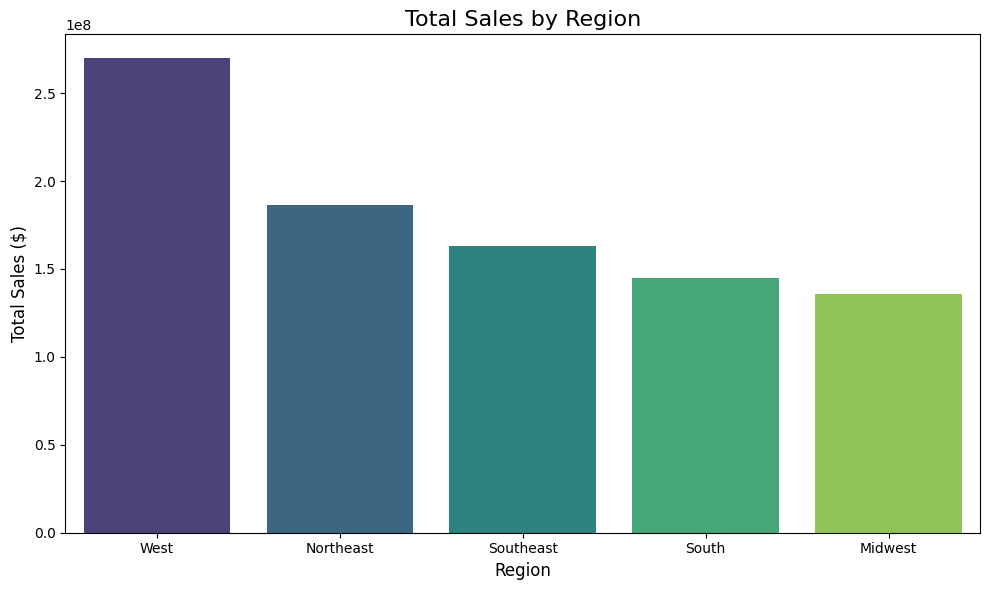

In [35]:
# Visualize sales trends by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis",)
plt.title("Total Sales by Region", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Sales in the West region lead the pack with an impressive 269.94 million, significantly outpacing other regions. Following closely is the Northeast region, with 186.32 million, reflecting strong urban consumer activity. Meanwhile, the Southeast and South regions also contribute robust figures of 163.17 million and 144.66 million, respectively, highlighting steady sales performance in these areas. However, the Midwest region lags behind, generating 135.80 million, signaling opportunities for targeted growth strategies.

<ipython-input-47-512cadba33c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Total Sales', data=df[df['City'].isin(top_5_city_sales.index)], palette="viridis")


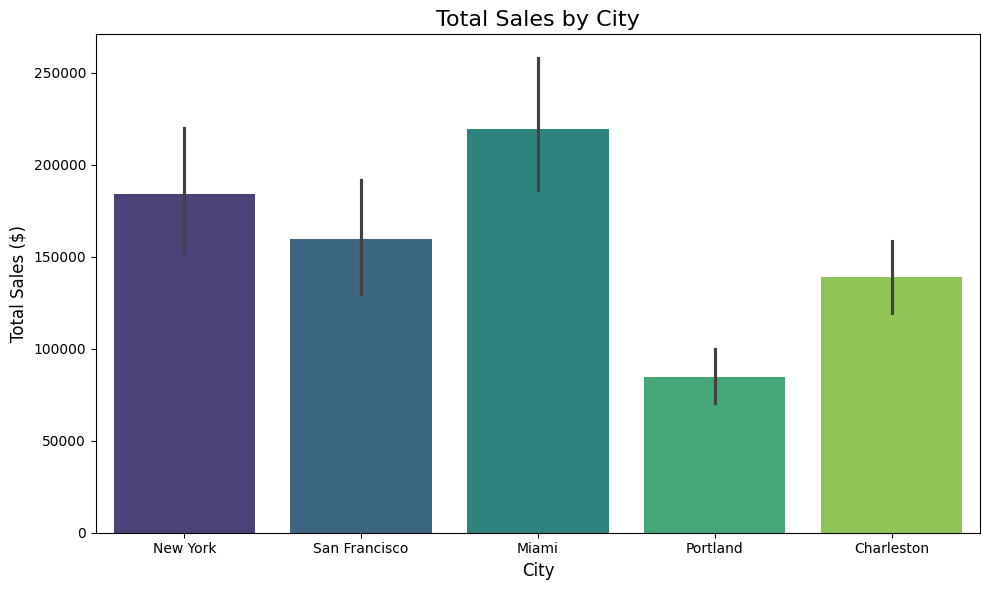

In [47]:
# Visualize sales trends by city
top_5_city_sales = city_sales.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total Sales', data=df[df['City'].isin(top_5_city_sales.index)], palette="viridis")
plt.title("Total Sales by City", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Looking at city-level performance, Charleston emerges as a star performer, contributing 39.97 million in sales, followed by New York City with 39.80 million, showcasing the city's consistent appetite for Adidas products. San Francisco claims the third spot with 34.53 million, fueled by its active lifestyle culture. However, on the other end of the spectrum, Omaha reports just 5.93 million in sales, and Minneapolis follows with 7.38 million, revealing opportunities for deeper market penetration in these areas.

<ipython-input-46-bae6d5b62562>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Total Sales', data=df[df['State'].isin(top_5_state_sales.index)], palette="viridis")


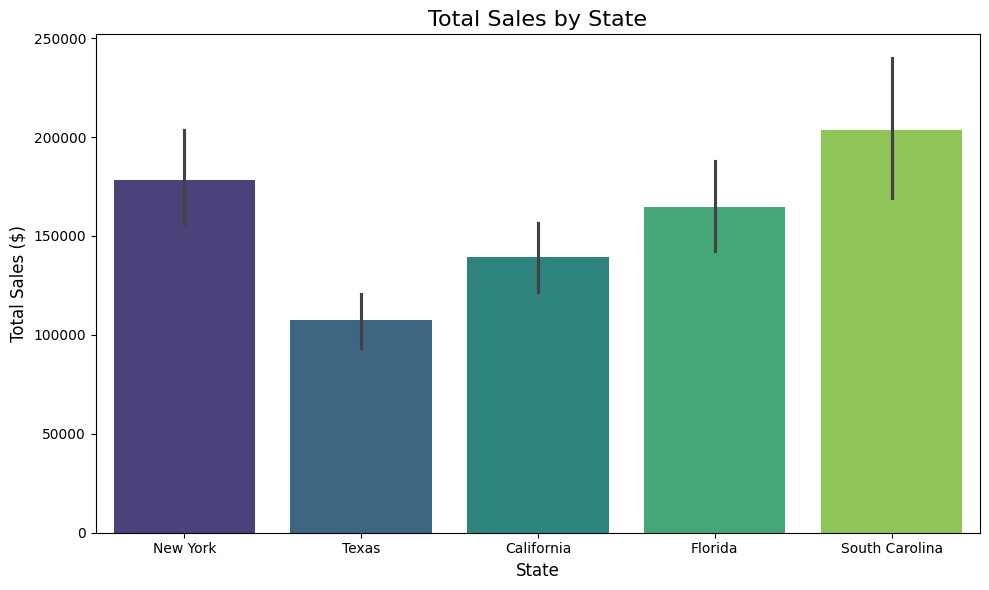

In [46]:
# Visualize sales trends by state
top_5_state_sales = state_sales.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Total Sales', data=df[df['State'].isin(top_5_state_sales.index)], palette="viridis")
plt.title("Total Sales by State", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

On a state level, New York reigns supreme at 64.23 million, showcasing a robust consumer base and high brand engagement. California follows closely with 60.17 million, reflecting its diverse and active population. Meanwhile, Nebraska, at the bottom with 5.93 million, and Minnesota, at 7.38 million, underline the need for strategic efforts to boost presence and sales in these regions.

<ipython-input-48-9a06e7466113>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="magma")


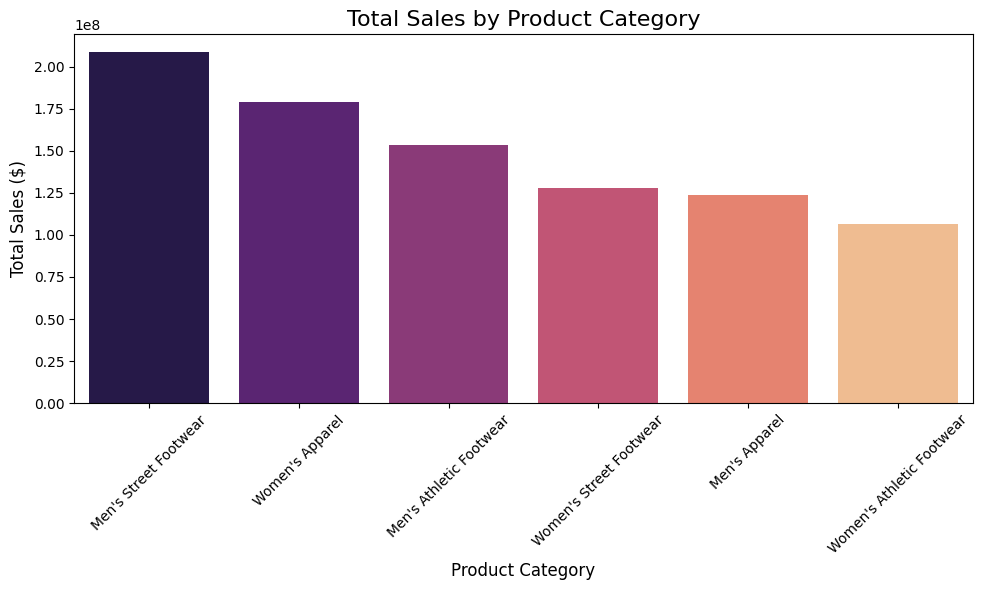

In [48]:
# Visualize sales trends by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="magma")
plt.title("Total Sales by Product Category", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("Product Category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The sales data reveals Men's Street Footwear as the undisputed leader, with a commanding total of $208.83 million. This category demonstrates the strong appeal of versatile and stylish options among male consumers, making it a cornerstone of Adidas' revenue.

Trailing closely behind, Women's Apparel secures the second spot with 179.04 million in sales. This indicates the growing popularity of Adidas' clothing line among women, likely driven by a blend of comfort, style, and activewear trends.

Men's Athletic Footwear takes the third position with 153.67 million, underscoring the enduring demand for performance-oriented footwear among male athletes and fitness enthusiasts. Meanwhile, Women's Street Footwear follows at 128.00 million, showcasing its significant role in the casual and lifestyle segment.

Further down the list, Men's Apparel brings in 123.73 million, reflecting steady engagement with Adidas' clothing offerings for men. At the same time, Women's Athletic Footwear rounds out the rankings with 106.63 million, emphasizing the potential for further growth in this segment through targeted marketing and innovative designs.


Total Sales by Sales Method:
Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64


<ipython-input-25-cae1228a3ac3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_sales.index, y=method_sales.values, palette="cool")


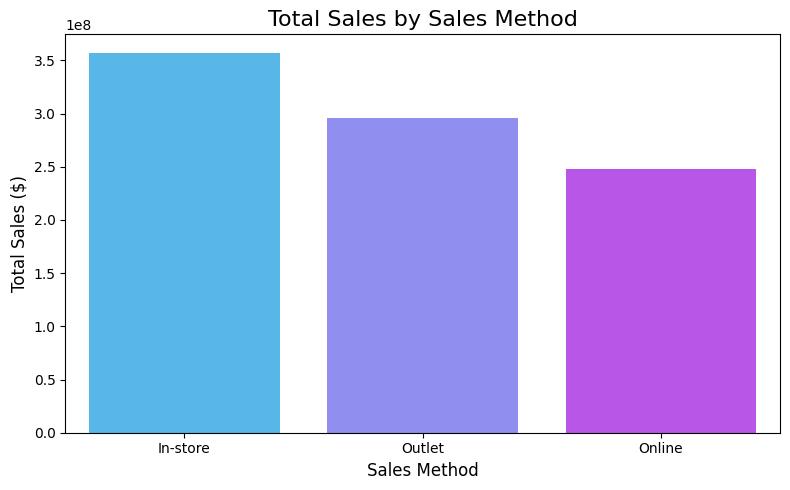

In [ ]:
print("\nTotal Sales by Sales Method:")
print(method_sales)

# Visualize sales trends by sales method
plt.figure(figsize=(8, 5))
sns.barplot(x=method_sales.index, y=method_sales.values, palette="cool")
plt.title("Total Sales by Sales Method", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("Sales Method", fontsize=12)
plt.tight_layout()
plt.show()


The in-store method leads as the most significant sales channel with **356.64M**, accounting for the highest share of revenue. This reflects the continued strength of physical retail in driving sales, likely supported by direct customer engagement, personalized shopping experiences, and product trial opportunities.

Outlets contribute substantially to revenue **(295.59M)**, serving as an effective channel for moving inventory and catering to price-sensitive customers. Their proximity to in-store sales highlights their strategic importance in Adidas’ overall sales ecosystem.

While online sales rank third **(247.67M)**, they represent a significant opportunity for growth. As digital transformation continues, this channel can be further optimized to capture market share through enhanced user experiences, targeted advertising, and streamlined logistics.

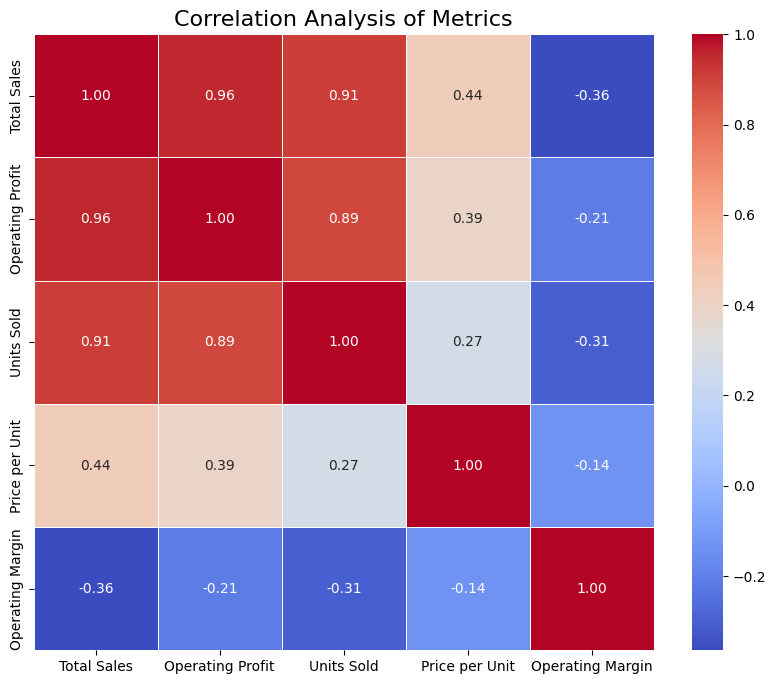

In [ ]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis of Metrics", fontsize=16)
plt.show()

**Total Sales and Operating Profit:**

A strong positive correlation (0.96) indicates that higher total sales strongly drive operating profit. This suggests that scaling sales effectively boosts profitability.

**Total Sales and Units Sold:**

A high positive correlation (0.91) highlights that sales volume is a major contributor to total sales. Maintaining competitive pricing and optimizing product distribution can amplify this trend.

**Price per Unit and Operating Margin:**

A negative correlation (-0.14) suggests that higher prices per unit do not necessarily improve operating margins, possibly due to increased costs or reduced demand for premium-priced products.

**Operating Margin and Total Sales:**

A negative correlation (-0.36) implies that regions or products with higher sales volumes might sacrifice margin, potentially due to discounts or operational inefficiencies.

**Operating Profit and Units Sold:**

A positive correlation (0.89) indicates that higher unit sales positively impact operating profit, reaffirming the importance of driving volume sales to enhance profitability.

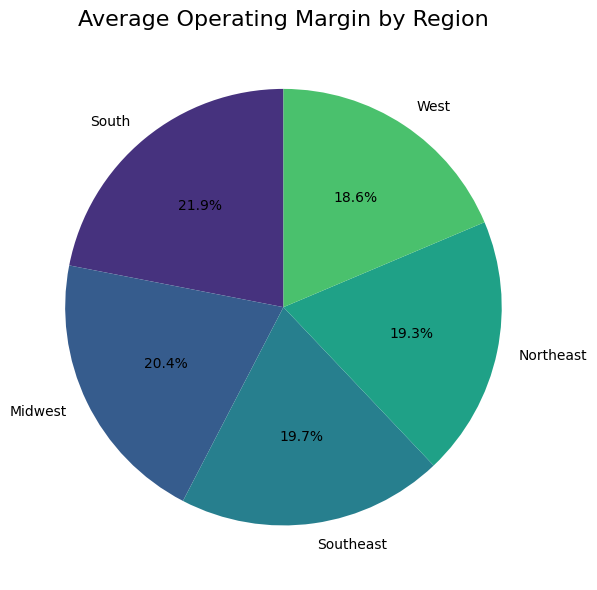

In [33]:
# operating profit margin by region
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.pie(region_operating_margin.values, labels=region_operating_margin.index,
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title("Average Operating Margin by Region", fontsize=16)
plt.tight_layout()
plt.show()

**The average operating margin for Adidas stands at 42.30%,** showcasing a solid profitability level across its operations. However, a closer look at regional performance reveals notable disparities.

The South region leads the charge with the highest operating margin of 46.69%, demonstrating exceptional cost efficiency and profitability. This success could stem from optimized supply chains or strong sales of high-margin products in the region.

The Midwest region follows with a robust margin of 43.53%, reflecting a steady balance between revenue generation and operational efficiency. Meanwhile, the Southeast region achieves an operating margin of 41.92%, slightly above the company average, indicating its strong contribution to overall profitability.

In contrast, the Northeast region, with a margin of 41.05%, and the West region, at 39.67%, lag behind. The West region’s performance, in particular, suggests opportunities to revisit pricing strategies or cost management practices to boost profitability.